<a href="https://colab.research.google.com/github/EddyGiusepe/ML_Mastery_Batch_Normalization/blob/main/ML_Mastery_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Batch Normalization**

O artigo original está [aqui](https://machinelearningmastery.com/better-deep-learning-neural-networks-crash-course/).

Aqui estudaremos como acelerar o processo de treinamento de nossa rede neural de aprendizado profundo usando a Batch normalization (**normalização em lote**).

A normalização em lote, ou ``batchnorm`` para abreviar, é proposta como uma técnica para ajudar a coordenar a atualização de várias camadas no modelo.

Os autores do artigo que introduz a **normalização de lote** referem-se à mudança na distribuição de entradas durante o treinamento como **mudança de covariável interna** (internal covariate shift). A normalização em lote foi projetada para contrabalançar a mudança interna da covariável ao dimensionar a saída da camada anterior, especificamente padronizando as ativações de cada variável de entrada por minibatch, como as ativações de um nó (neurônio) da camada anterior.



O ``Keras`` oferece suporte à normalização em lote por meio de uma ``camada BatchNormalization`` separada que pode ser adicionada entre as camadas ocultas de seu modelo. Por exemplo:

**model.add(BatchNormalization())**



O exemplo abaixo demonstra um ``modelo Multilayer Perceptron`` com normalização em lote em um problema de classificação binária.

## Importamos nossas bibliotecas

In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

## Geramos nosso Dataset

In [2]:
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

## Dividimos nossos Dados em treino e teste

In [3]:
n_train = 500
trainx, testx = x[:n_train, :], x[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## Construímos nosso modelo

In [4]:
model = Sequential()

model.add(Dense(64, input_dim=2, activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(16, activation = 'relu',
                kernel_initializer = 'he_normal', use_bias = False))

model.add(BatchNormalization())

model.add(Dense(8, activation = 'relu',
                kernel_initializer = 'he_normal', use_bias = False))

model.add(Dropout(0.1))

model.add(Dense(4, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

## Compilamos nosso modelo

In [5]:

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


## Ajustamos nosso modelo (Fit model)

In [6]:
history = model.fit(trainx, trainy, batch_size = 100, validation_data=(testx, testy),
                    epochs=300, verbose=0)

## Avaliamos nosso modelo

In [7]:
_, train_acc = model.evaluate(trainx, trainy, verbose=1)
_, test_acc = model.evaluate(testx, testy, verbose=1)

16/16 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8520


In [8]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.838, Test: 0.852


## Plotamos nossas curvas

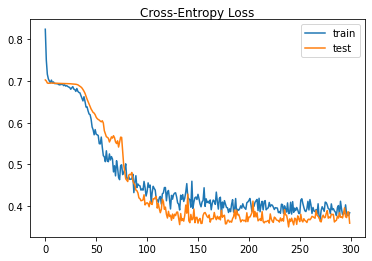

In [9]:
# plot loss learning curves

plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


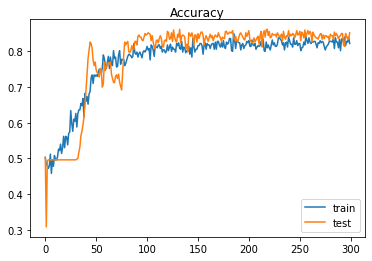

In [10]:
# plot accuracy learning curves

plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**NOTA:**
Para esta lição, você deve executar o exemplo de código com e sem normalização em lote e descrever o efeito que a normalização em lote tem nas curvas de aprendizado durante o treinamento.